In [ ]:
from google.colab import files
uploaded = files.upload(
)

Saving task5.csv to task5.csv


In [ ]:
CONFIG = dict(
    time_col        = "Time",
    day_col         = "Day_of_week",
    road_cond_col   = "Cause_of_accident",   # closest proxy
    weather_col     = "Pedestrian_movement", # closest environmental interaction
    severity_col    = "Accident_severity"
)


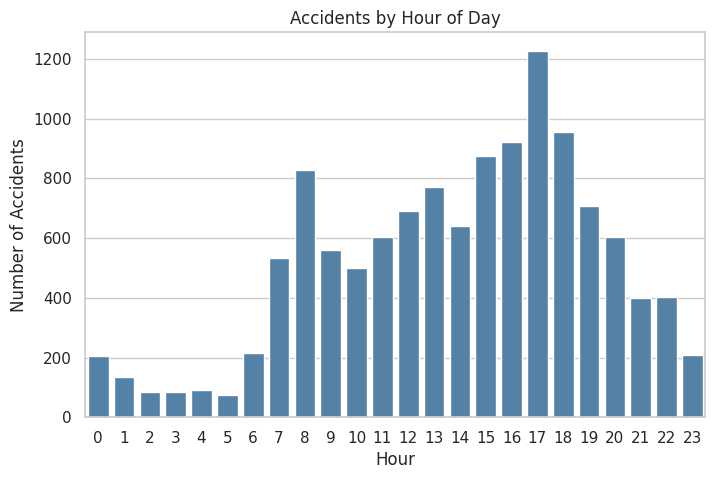

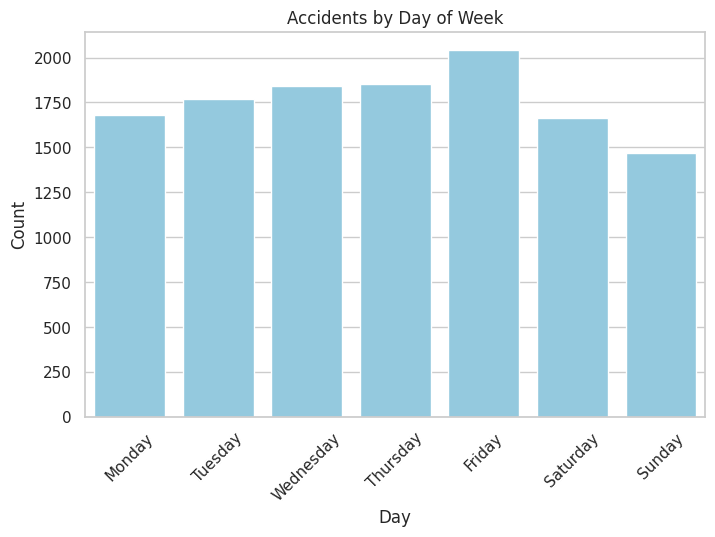

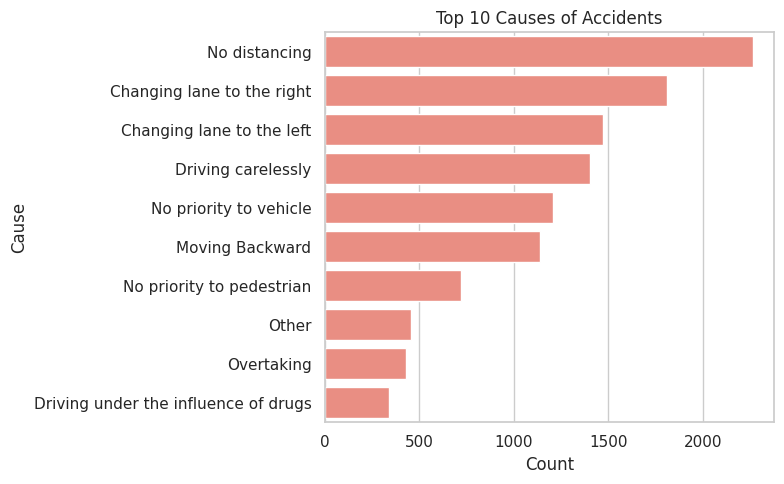

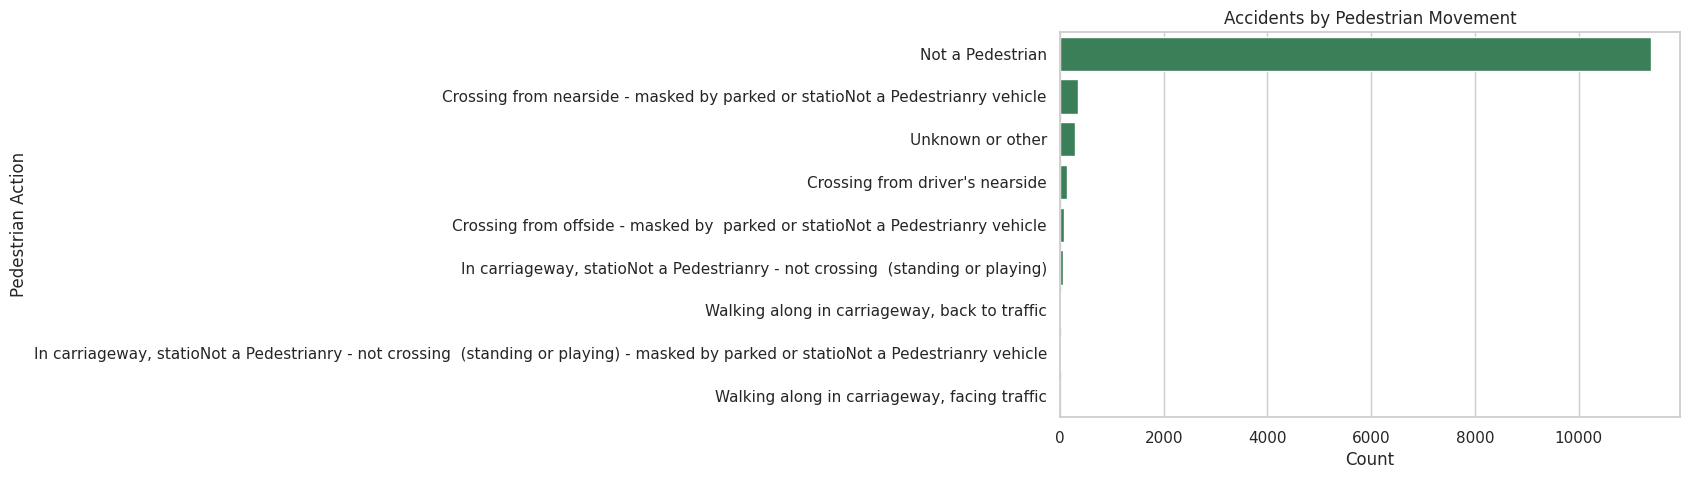

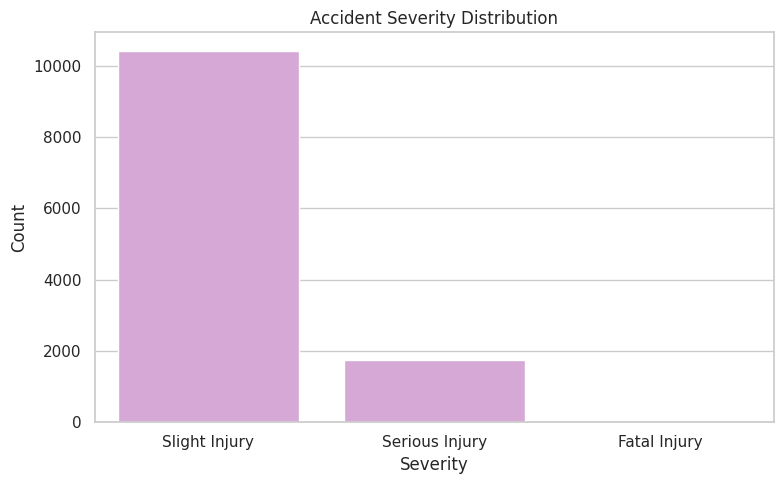

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

df = pd.read_csv("task5.csv")

CONFIG = dict(
    time_col        = "Time",
    day_col         = "Day_of_week",
    road_cond_col   = "Cause_of_accident",
    weather_col     = "Pedestrian_movement",
    severity_col    = "Accident_severity"
)

# Fix 1: Parse hour using correct format
df["Hour"] = pd.to_datetime(df[CONFIG["time_col"]], format="%H:%M:%S", errors="coerce").dt.hour

# Clean NAs
for col in CONFIG.values():
    df[col] = df[col].fillna("Unknown")

# Hour-wise accident plot
sns.countplot(x="Hour", data=df, color="steelblue")
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()

# Day of Week
sns.countplot(x=CONFIG["day_col"], data=df, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], color="skyblue")
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Top 10 accident causes
top_causes = df[CONFIG["road_cond_col"]].value_counts().nlargest(10)
sns.barplot(y=top_causes.index, x=top_causes.values, color="salmon")
plt.title("Top 10 Causes of Accidents")
plt.xlabel("Count")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()

# Pedestrian movement
ped_movement = df[CONFIG["weather_col"]].value_counts().nlargest(10)
sns.barplot(y=ped_movement.index, x=ped_movement.values, color="seagreen")
plt.title("Accidents by Pedestrian Movement")
plt.xlabel("Count")
plt.ylabel("Pedestrian Action")
plt.tight_layout()
plt.show()

# Accident severity
severity_order = ['Slight Injury', 'Serious Injury', 'Fatal Injury']
sns.countplot(x=CONFIG["severity_col"], data=df, order=severity_order, color='plum')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
